# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


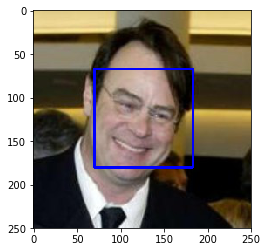

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [5]:
#face_detector(human_files_short[1])

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

1. 98% of the images in human_files_short were detected to have a face.
2. 17% of the images in dog_files_short were detected to have a face.  

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


In [5]:
# Create an empty dictionary to store the human files results
results_humans = dict()


# Set initial counter to 0
results_humans['n_true'] = 0
results_humans['n_false'] = 0


# Run through each of the files in human_files_short
for i in range(len(human_files_short)):
    if face_detector(human_files_short[i]) == True:
        results_humans['n_true'] += 1
      
    else:
        results_humans['n_false'] += 1
        

print('The percentage of human faces in human_files_short is ', results_humans['n_true']/len(human_files_short) * 100)





The percentage of human faces in human_files_short is  98.0


In [6]:
# Create an empty dictionary to store the human files results
results_dogs = dict()


# Set initial counter to 0
results_dogs['n_true'] = 0
results_dogs['n_false'] = 0


# Run through each of the files in human_files_short
for i in range(len(dog_files_short)):
    if face_detector(dog_files_short[i]) == True:
        results_dogs['n_true'] += 1
      
    else:
        results_dogs['n_false'] += 1
        

print('The percentage of human faces in dogs_files_short is ', results_dogs['n_true']/len(dog_files_short) * 100)


The percentage of human faces in dogs_files_short is  17.0


In [7]:

"""true = 0
false = 0

for i in (human_files_short):
    if face_detector(i) == True:
        true += 1
    else:
        false += 0
            

#print("The number of humans is ", true)"""


'true = 0\nfalse = 0\n\nfor i in (human_files_short):\n    if face_detector(i) == True:\n        true += 1\n    else:\n        false += 0\n            \n\n#print("The number of humans is ", true)'

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:36<00:00, 15042069.06it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms


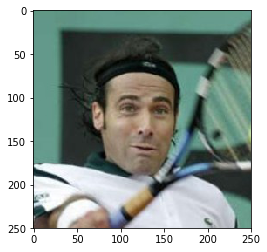

In [10]:
img = Image.open(human_files[1])
plt.imshow(img)

In [11]:
img = Image.open(dog_files_short[1])
pil2tensor = transforms.ToTensor()
rgb_image = pil2tensor(img)
rgb_image.size()

torch.Size([3, 307, 300])

In [12]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    '''
    From https://pytorch.org/docs/stable/torchvision/models.html:
    All pre-trained models expect input images normalized in the same way,
    i.e. mini-batches of 3-channel RGB images of shape (3 x H x W),
    where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] 
    and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
    '''
    
     # Data loading code
    image = Image.open(img_path)
    
    #transform the image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    
    transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,])
    
    img = transform(image)
    
    # unsqueeze the image
    img_t = torch.unsqueeze(img, 0)
    
    # move tensor to cuda
    if torch.cuda.is_available():
        img_t = img_t.cuda()
    
    # Turn the model into eval mode
    VGG16.eval()
    
    # Use the model to output the predicted class index
    output = VGG16(img_t)
    
    #Find the maximum index 
    idx = VGG16(img_t)
    _, idx = torch.max(output, 1)
    
    ## Return the *index* of the predicted class for that image
    
    return idx # predicted class index

In [13]:
 # Data loading code
image = Image.open(human_files_short[1])

#transform the image
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,])

img = transform(image)

# unsqueeze the image
img_t = torch.unsqueeze(img, 0)

print(img.shape)
print(img_t.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [14]:
output = VGG16_predict(human_files[1])
output

tensor([ 456], device='cuda:0')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [15]:
#check to make sure the range included is inclusive
np.arange(151,269)

array([151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268])

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    output = VGG16_predict(img_path)
        
    return output in np.arange(151,269) # true/false

True


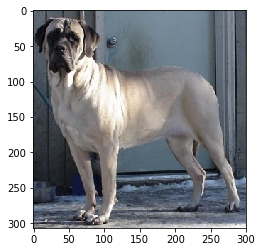

In [17]:
#test the dog detector
img = Image.open(dog_files_short[1])
plt.imshow(img)
print(dog_detector(dog_files_short[1]))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

 - 0% of images in human_files_short detected a dog
 - 100% of images in dog_files_short deteted a dog


In [24]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
 

true = 0
false = 0

for i in (human_files_short):
    if dog_detector(i) == True:
        true += 1
    else:
        false += 0
            

print("The percentage of dogs in human_files_short is ", (true/len(human_files_short) * 100))
    


The percentage of dogs in human_files_short is  0.0


In [25]:
# Create an empty dictionary to store the dog files results
true = 0
false = 0

for i in (dog_files_short):
    if dog_detector(i) == True:
        true += 1
    else:
        false += 0
            

print("The percentage of dogs in dog_files_short is ", (true/len(dog_files_short) * 100))

The percentage of dogs in dog_files_short is  100.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
import torchvision.models as models
from PIL import Image

# check if CUDA is available
use_cuda = torch.cuda.is_available()

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Load the training, validation, and test datasets
#train_dir = np.array(glob("/data/dog_images/train/*/*"))
#valid_dir = np.array(glob("/data/dog_images/valid/*/*"))
#test_dir = np.array(glob("/data/dog_images/test/*/*"))


In [3]:
data_dir = '/data/dog_images'
train_dir = data_dir +'/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [4]:
os.listdir(data_dir)

['train', 'test', 'valid']

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
# create the transforms

train_transform = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


valid_transform = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


test_transform = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


In [7]:
# Load the datasets 
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

In [8]:
# Using the image datasets and the transforms, define the dataloaders

batch_size = 50
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [8]:
loaders_scratch ={'train': trainloader, 'valid': validloader, 'test':testloader}

In [3]:
# testing out resizing images

"""
img = Image.open(dog_files_short[1])
pil2tensor = transforms.ToTensor()
resize = transforms.RandomResizedCrop(224)
rgb_image_1 = resize(img)
rgb_image = pil2tensor(rgb_image_1)
rgb_image.size()

"""

'\nimg = Image.open(dog_files_short[1])\npil2tensor = transforms.ToTensor()\nresize = transforms.RandomResizedCrop(224)\nrgb_image_1 = resize(img)\nrgb_image = pil2tensor(rgb_image_1)\nrgb_image.size()\n\n'

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

The images were resized via cropping. All the images are not the same size. Some images are 250 x 250 others are 300 x307. I picked 224 x 224 because that was the standard image size used in the trained neural networks. Another option would have been to scan through the image files and resize the image to be the smallest size picture or to throw out a picture that did not meet a minimum size. 


- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

Yes, I decided to augment the dataset by random rotations and random horizontal flips in order to improve the training dataset. 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # Convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16,32,3, padding = 1)
        self.conv3 = nn.Conv2d(32,64,3, padding = 1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        
        # Fully connected layers
        # Define the hidden layers at 64 * 28* 28, 500 and 133 units.
        # Where 64 is the depth and 28 x 28 is the output 
        # 133 is the number of classes in the dog files (the README file has 133 files folders)
        self.fc1 = nn.Linear(64 * 28 * 28, 750)
        self.fc2 = nn.Linear(750,500)
        self.fc3 = nn.Linear(500, 133)
        # dropout layer to prevent overfitting data
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten the image input for fully connected layers
        x = x.view (-1, 64*28*28)
        # Hidden Layers with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # output layer
        x = F.relu(self.fc3(x))
        
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

 - Overall model:
 
     * Started with 3 convolutional layers and 3 Linear Layers. If ther performance is poor, I would consider changing the number of layers and thus the depth of each layer
     * Each layer uses Relu activation function
   
 - Convolutional layers + maxpooling
     * The inputs to the convolutional layers is 3 (RGB color channel) and a 224x224 image
     * The depth of the image increases by two starting from a convolutional dimension of 16
     * The image is reduced in size by 2 for three layers resulting in an image that is 28x18 pixels
 
 
 The output of a convolutional layer was determined using the equation from the Stanford's cs231 course:

* * *
>"We can compute the spatial size of the output volume as a function of the input volume size (W), the kernel/filter size (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. The correct formula for calculating how many neurons define the output_W is given by (W−F+2P)/S+1."


> - nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0) 
> - in_channels = depth of an input (for grayscale, it's 1)
> - out_channels = desired output or the number of filtered images
> - kernal_size = size of the convolutional kernal (most commonly 3 for a 3x3)
> - stride/padding = have default values but should be set based on how large you want your output to be
 
 * * *
 
   I added max pooling in order to try to avoid overfitting the model. 

 - Linear Layers + Dropout
     * Three linear layers with a final output of 133 are included with dropout to avoid overfitting the model
     * The input to the linear layer is a flattened view of the output from the convolutional layers. 
     
 
 










### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            #forward pass: comput predicted outputs by passing inputs into the model
            output = model_scratch(data)
            
            #calculate the batch loss
            loss = criterion(output,target)
            
            #backward pass: compute gradient of the loss with respect to model
            loss.backward()
            
            # perform single optimization step (parameter update)
            optimizer.step()
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # forward pass
            output = model_scratch(data)
            
            #calculate the batch loss
            loss = criterion(output,target)
                   
            ## update the average validation loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss    
    # return trained model
    return model


# train the model
#model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      #criterion_scratch, use_cuda, 'model_scratch.pt')

model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.610456 	Validation Loss: 4.510896
Validation loss decreased (inf --> 4.510896).  Saving model ...
Epoch: 2 	Training Loss: 4.590915 	Validation Loss: 4.481493
Validation loss decreased (4.510896 --> 4.481493).  Saving model ...
Epoch: 3 	Training Loss: 4.586236 	Validation Loss: 4.457131
Validation loss decreased (4.481493 --> 4.457131).  Saving model ...
Epoch: 4 	Training Loss: 4.572932 	Validation Loss: 4.451640
Validation loss decreased (4.457131 --> 4.451640).  Saving model ...
Epoch: 5 	Training Loss: 4.546935 	Validation Loss: 4.421338
Validation loss decreased (4.451640 --> 4.421338).  Saving model ...
Epoch: 6 	Training Loss: 4.550456 	Validation Loss: 4.411042
Validation loss decreased (4.421338 --> 4.411042).  Saving model ...
Epoch: 7 	Training Loss: 4.538627 	Validation Loss: 4.398308
Validation loss decreased (4.411042 --> 4.398308).  Saving model ...
Epoch: 8 	Training Loss: 4.511124 	Validation Loss: 4.373870
Validation loss decreased (4.39830

Epoch: 88 	Training Loss: 3.532107 	Validation Loss: 3.824315
Epoch: 89 	Training Loss: 3.535791 	Validation Loss: 3.808291
Epoch: 90 	Training Loss: 3.532060 	Validation Loss: 3.793464
Epoch: 91 	Training Loss: 3.518795 	Validation Loss: 3.748433
Validation loss decreased (3.750163 --> 3.748433).  Saving model ...
Epoch: 92 	Training Loss: 3.489486 	Validation Loss: 3.808008
Epoch: 93 	Training Loss: 3.480271 	Validation Loss: 3.808447
Epoch: 94 	Training Loss: 3.460424 	Validation Loss: 3.724427
Validation loss decreased (3.748433 --> 3.724427).  Saving model ...
Epoch: 95 	Training Loss: 3.469633 	Validation Loss: 3.699302
Validation loss decreased (3.724427 --> 3.699302).  Saving model ...
Epoch: 96 	Training Loss: 3.420967 	Validation Loss: 3.832802
Epoch: 97 	Training Loss: 3.434997 	Validation Loss: 3.796737
Epoch: 98 	Training Loss: 3.413398 	Validation Loss: 3.737437
Epoch: 99 	Training Loss: 3.407360 	Validation Loss: 3.750637
Epoch: 100 	Training Loss: 3.384865 	Validation L

In [18]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.755495


Test Accuracy: 14% (121/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [9]:
## TODO: Specify data loaders
# Using the same data loader from previous step except changing the name to loaders_transfer

loaders_transfer ={'train': trainloader, 'valid': validloader, 'test':testloader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# Load the pretrained model
model_transfer = models.vgg16(pretrained = True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()


#Visualize the model structure
model_transfer

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:09<00:00, 57613145.81it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [14]:
# For this exercise, we'll change the last linear layer to match the outputs
# for the dog project at 133

#view the last layers input and output features

print(model_transfer.classifier[6].in_features)
print(model_transfer.classifier[6].out_features)

4096
1000


In [15]:
# Freeze training for all 'features' layers

for param in model_transfer.features.parameters():
    param.requires_grad = False

In [16]:
# change the last layer to 133 layers

n_inputs = model_transfer.classifier[6].in_features

# add last linear layers (n_inputs to 133 dog classes)
# new layers automatically have requires_grad = True

last_layer = nn.Linear(n_inputs,133)
model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer.cuda()

#check to see that the last layer produces the expected number of outputs
print(model_transfer.classifier[6].out_features)

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

1. Loaded in the pre-trained VGG16 model
2. "Froze" all of the parameters so the pre-trained model will not change during training
3. Removed the last layer 
4. Replaced the last layer with different linear classifier (i.e. changed the ouput size to 133 to match the categories of dogs)

VGG16 has proven well on image classification and it performed well on the dog classification exercise above.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [15]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            #forward pass: comput predicted outputs by passing inputs into the model
            output = model(data)
            
            #calculate the batch loss
            loss = criterion(output,target)
            
            #backward pass: compute gradient of the loss with respect to model
            loss.backward()
            
            # perform single optimization step (parameter update)
            optimizer.step()
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # forward pass
            output = model(data)
            
            #calculate the batch loss
            loss = criterion(output,target)
                   
            ## update the average validation loss
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    # return trained model
    return model


In [16]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 4.754009 	Validation Loss: 4.170502
Validation loss decreased (inf --> 4.170502).  Saving model ...
Epoch: 2 	Training Loss: 4.121973 	Validation Loss: 3.345654
Validation loss decreased (4.170502 --> 3.345654).  Saving model ...
Epoch: 3 	Training Loss: 3.476663 	Validation Loss: 2.478893
Validation loss decreased (3.345654 --> 2.478893).  Saving model ...
Epoch: 4 	Training Loss: 2.871974 	Validation Loss: 1.754701
Validation loss decreased (2.478893 --> 1.754701).  Saving model ...
Epoch: 5 	Training Loss: 2.342053 	Validation Loss: 1.271586
Validation loss decreased (1.754701 --> 1.271586).  Saving model ...
Epoch: 6 	Training Loss: 2.027630 	Validation Loss: 0.985453
Validation loss decreased (1.271586 --> 0.985453).  Saving model ...
Epoch: 7 	Training Loss: 1.795649 	Validation Loss: 0.819533
Validation loss decreased (0.985453 --> 0.819533).  Saving model ...
Epoch: 8 	Training Loss: 1.634950 	Validation Loss: 0.707886
Validation loss decreased (0.81953

In [18]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [18]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.464135


Test Accuracy: 85% (718/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [23]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
import torchvision.transforms as transforms

# Load the datasets 
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# Define data_transfer
data_transfer = {'train': train_data, 'valid': valid_data, 'test': test_data}

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # making model_transfer a global variable since defined outside the function
    global model_transfer
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    
    # Resize image
    
    data_transform = transforms.Compose([transforms.Resize((224,224)), 
                                      transforms.ToTensor()])
    
    image = data_transform(image)
    
    #transform_pipeline = transforms.Compose([transforms.Resize(size=(224, 224)),
    #                                      transforms.ToTensor()])
    #image = transform_pipeline(image)[:3,:,:].unsqueeze(0)
    
    
    image = image.unsqueeze(0)
    
    
    if use_cuda:
        model_transfer = model_transfer.cuda()
        image = image.cuda()
    
    
    model_transfer.eval()
    # Calculate the class probabilities 
    
    with torch.no_grad():
        output = model_transfer(image)
    
    # convert output probabilities to predicted class
    _,idx = torch.max(output,1)

    return class_names[idx]

In [10]:
class_names[0]

'Affenpinscher'

In [24]:
# Test the predict_breed_transfer function

img_path = dog_files[0]
prediction = predict_breed_transfer(img_path)

print('img_path:', img_path)
print('prediction:',prediction)

img_path: /data/dog_images/train/103.Mastiff/Mastiff_06833.jpg
prediction: Bullmastiff


In [82]:
dog_files[0]

'/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg'

In [84]:
img_path = './test_data/my_humans/Human_2.jpg'
prediction = predict_breed_transfer(img_path)

print('img_path:', img_path)
print('prediction:',prediction)

img_path: ./test_data/my_humans/Human_2.jpg
prediction: Greyhound


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [94]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    #if a dog is detected in the image, return the predicted breed.
    if dog_detector(img_path):
        breed = predict_breed_transfer(img_path)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
        print('Dog Detected. The breed is: ', breed)
    
    #if a human is detected in the image, return the resembling dog breed.
    elif face_detector(img_path) > 0:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
        breed = predict_breed_transfer(img_path)
        print('Human Detected, but you look like a ', breed)
    
    #if neither is detected in the image, provide output that indicates an error
    else:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.show()
        print('This is not a dog or a human. Try again.')



---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output was okay. It didn't perform as well as I would have expected. However, it was interesting to note that when the image had more than one person, it seemed like the model became confused. 

Some points for improvement are the following:

 1. Increase the number of convolutional layers and/or filter size
 
 2. Train for more epochs to increase the accuracy above 90% (right now it's only 85%)
 
 3. Provide more training data via more transforms
 
 Another option would be to try with a different model instead of VGG16 to see how it performs. 



This is not a dog or a human. Try again.
./test_data/my_humans/Human_1.jpg


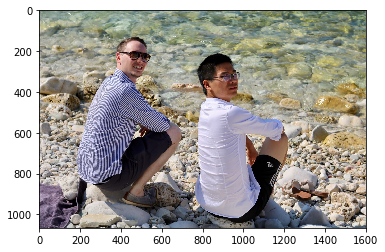

Human Detected, but you look like a  Greyhound
./test_data/my_humans/Human_2.jpg


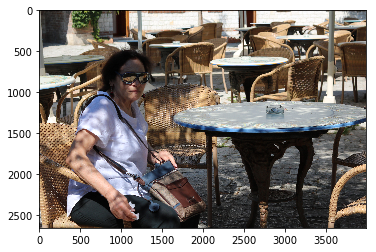

Human Detected, but you look like a  Borzoi
./test_data/my_humans/Venice_Bird.jpg


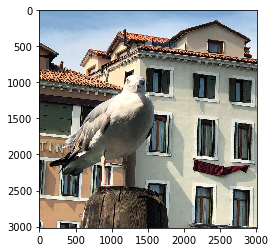

In [93]:
human_data_dir = './test_data/my_humans/'
idx = 1
for idx in range(1,4):
    img_path = human_data_dir + os.listdir(human_data_dir)[idx]
    run_app(img_path)
    print(img_path)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

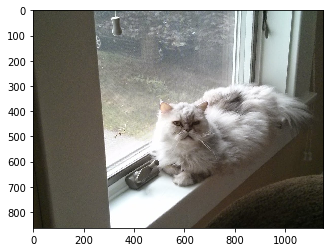

This is not a dog or a human. Try again.
./test_data/my_dogs/Cat_1.jpg


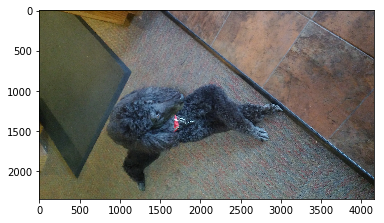

Human Detected, but you look like a  Bedlington terrier
./test_data/my_dogs/Dog_2.jpg


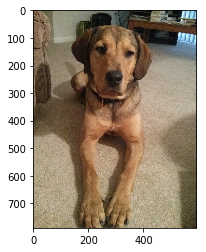

Dog Detected. The breed is:  Labrador retriever
./test_data/my_dogs/Dog_1.jpg


In [97]:
dog_data_dir = './test_data/my_dogs/'
idx = 0
for idx in range(0,3):
    img_path = dog_data_dir + os.listdir(dog_data_dir)[idx]
    run_app(img_path)
    print(img_path)
    #img = Image.open(img_path)
    #plt.imshow(img)
    #plt.show()

In [28]:
## Commented out code and ran the code above the 

## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# load filenames for human and dog images
#human_files_test = np.array(glob("/data/test_data/my_humans"))
#dog_files_test = np.array(glob("/data/test_data/my_dogs"))

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
#    run_app(file)
